## Binary Classification Task 2: Load Default

### Step 1: Import Libraries and Load Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv(r"A:\Code\PY\DSc\datasets\04-binary-classification\credit_default.csv")
df

,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1
...,...,...,...,...,...
1995,59221.04487,48.518179,1926.729397,0.032535,0
1996,69516.12757,23.162104,3503.176156,0.050394,0
1997,44311.44926,28.017167,5522.786693,0.124636,1
1998,43756.05660,63.971796,1622.722598,0.037086,0


### Step 1: EDA + Preprocess + train test split

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.3 KB


In [5]:
df.describe()

,Income,Age,Loan,Loan to Income,Default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45331.600018,40.927143,4444.369695,0.098403,0.141500
std,14326.327119,13.262450,3045.410024,0.057620,0.348624
min,20014.489470,18.055189,1.377630,0.000049,0.000000
25%,32796.459720,29.062492,1939.708847,0.047903,0.000000
50%,45789.117310,41.382673,3974.719418,0.099437,0.000000
75%,57791.281670,52.596993,6432.410625,0.147585,0.000000
max,69995.685580,63.971796,13766.051240,0.199938,1.000000


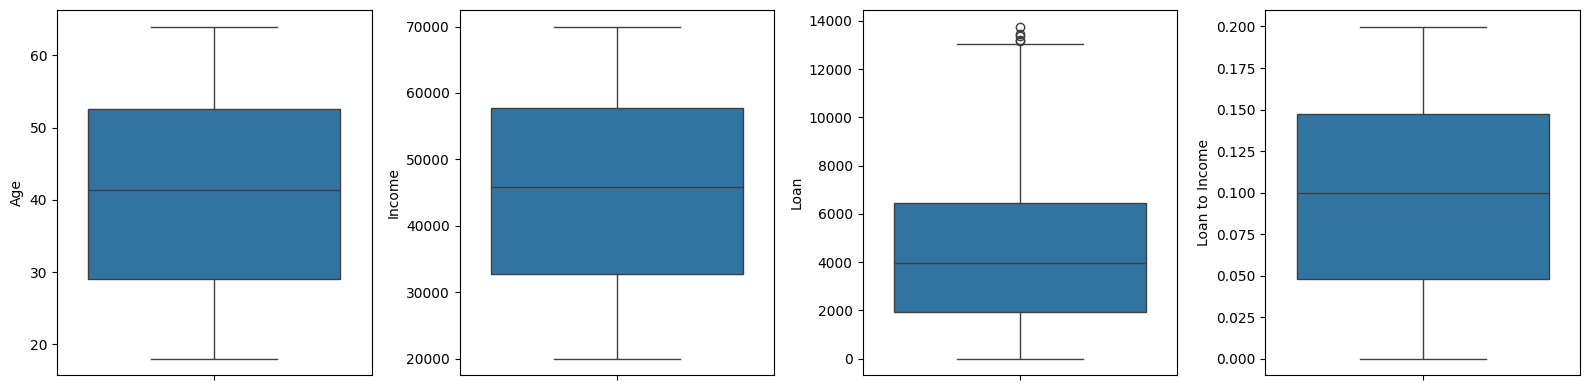

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(16,4))

sns.boxplot(df["Age"], ax=ax1)
sns.boxplot(df["Income"], ax=ax2)
sns.boxplot(df["Loan"], ax=ax3)
sns.boxplot(df["Loan to Income"], ax=ax4)

plt.tight_layout()


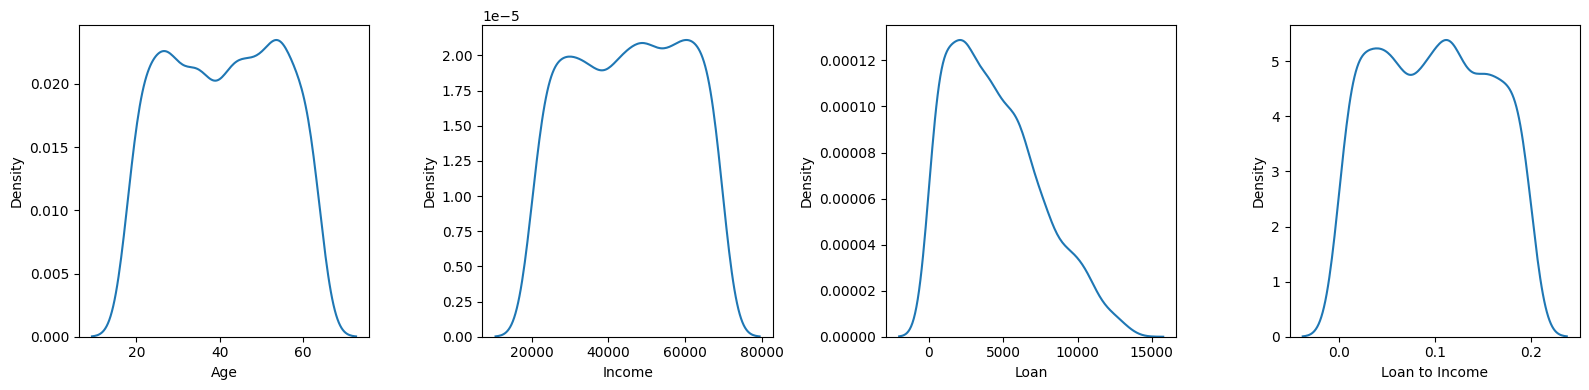

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(16,4))

sns.kdeplot(df["Age"], ax=ax1)
sns.kdeplot(df["Income"], ax=ax2)
sns.kdeplot(df["Loan"], ax=ax3)
sns.kdeplot(df["Loan to Income"], ax=ax4)

plt.tight_layout()


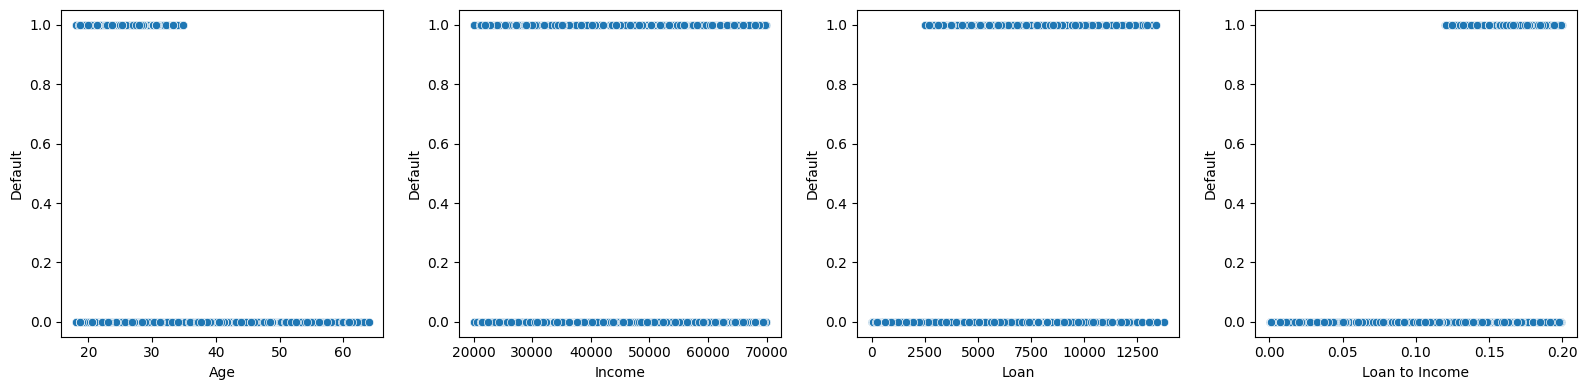

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(16,4))

sns.scatterplot(data=df, x="Age", y="Default", ax=ax1)
sns.scatterplot(data=df, x="Income", y="Default", ax=ax2)
sns.scatterplot(data=df, x="Loan", y="Default", ax=ax3)
sns.scatterplot(data=df, x="Loan to Income", y="Default", ax=ax4)


plt.tight_layout()


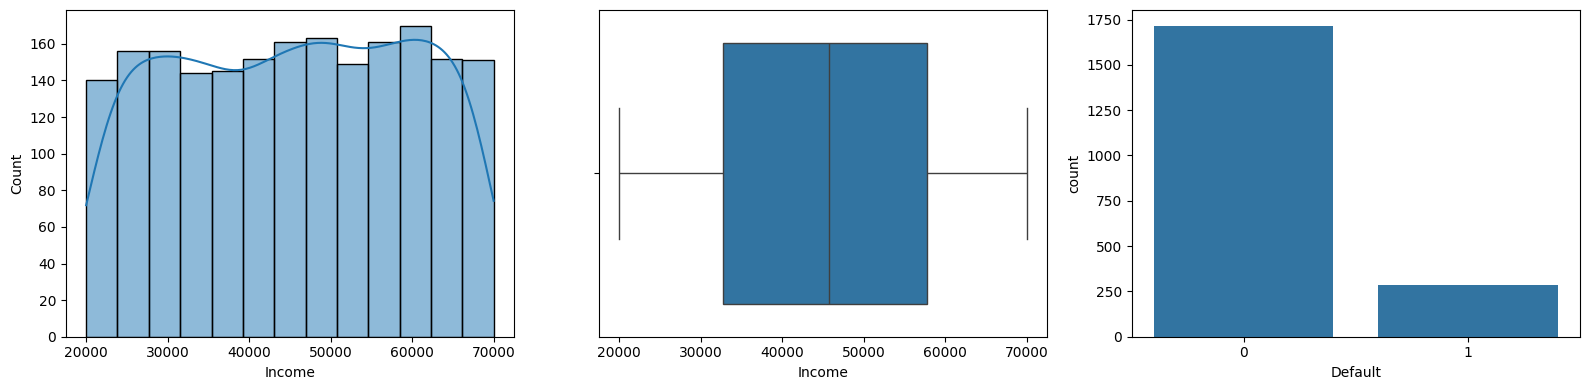

In [17]:
import seaborn as sns
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,4))


sns.histplot(df['Income'], kde=True, ax=ax1)
sns.boxplot(x=df['Income'], ax=ax2)
sns.countplot(x=df['Default'], ax=ax3)

plt.tight_layout()


<Axes: >

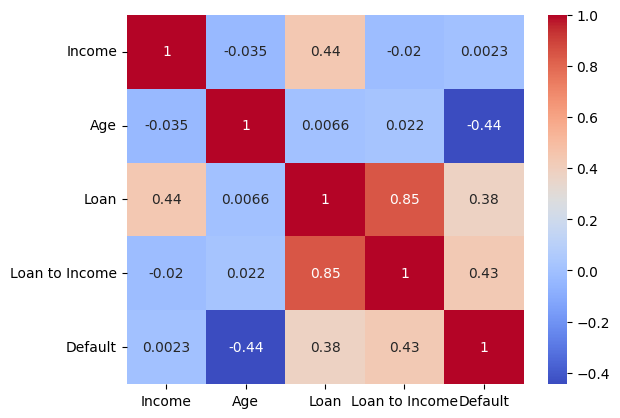

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='Loan to Income', ylabel='Default'>

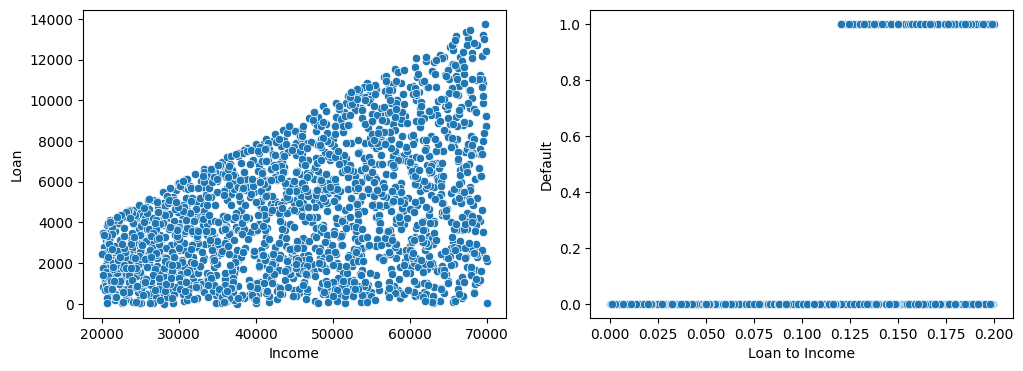

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
sns.scatterplot(x=df['Income'], y=df['Loan'], ax=ax1)
sns.scatterplot(x=df['Loan to Income'], y=df['Default'], ax=ax2)


In [20]:
# Check for class imbalance in the target variable Default. If the dataset is highly imbalanced, 
# you might need to apply techniques such as oversampling/undersampling or use specific evaluation metrics (like ROC-AUC).

df['Default'].value_counts()

Default
0    1717
1     283
Name: count, dtype: int64

For exploratory data analysis (EDA) on this dataset, which appears to involve financial data about individuals, the following steps can be performed to gain insights into the relationships between the variables and understand the dataset better. Here's an outline of key steps:

### 1. **Summary Statistics**
   - **Descriptive Statistics**: Get the mean, median, standard deviation, min, max, and quartiles for each numerical column (`Income`, `Age`, `Loan`, `Loan to Income`, `Default`).
     - This will provide an overview of the distribution and potential outliers.
     ```python
     df.describe()
     ```

### 2. **Missing Data Analysis**
   - Check for missing values in the dataset. If there are any, decide how to handle them (imputation, removal, etc.).
     ```python
     df.isnull().sum()
     ```

### 3. **Univariate Analysis**
   - **Visualizations**:
     - **Histograms**: To visualize the distribution of each continuous variable (e.g., `Income`, `Age`, `Loan`, `Loan to Income`).
     - **Box Plots**: To detect outliers for numerical variables.
     - **Count Plots**: For categorical variables (in this case, `Default` which is binary).
     ```python
     import seaborn as sns
     sns.histplot(df['Income'], kde=True)
     sns.boxplot(x=df['Income'])
     sns.countplot(x=df['Default'])
     ```

### 4. **Bivariate Analysis**
   - **Correlation Matrix**: Check for correlations between numerical variables using a heatmap. This will show potential relationships between `Income`, `Age`, `Loan`, `Loan to Income`, and `Default`.
     ```python
     sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
     ```
   - **Pair Plots**: Visualize the relationships between multiple numerical features in pairs.
     ```python
     sns.pairplot(df)
     ```

   - **Scatter Plots**: Investigate the relationship between pairs of variables like `Income vs. Loan`, `Loan to Income vs. Default`, etc.
     ```python
     sns.scatterplot(x=df['Income'], y=df['Loan'])
     sns.scatterplot(x=df['Loan to Income'], y=df['Default'])
     ```

   - **Boxplots by Default**: Check how numerical features vary across the `Default` category (target variable).
     ```python
     sns.boxplot(x=df['Default'], y=df['Income'])
     sns.boxplot(x=df['Default'], y=df['Loan'])
     ```

### 5. **Class Imbalance**
   - Check for class imbalance in the target variable `Default`. If the dataset is highly imbalanced, you might need to apply techniques such as oversampling/undersampling or use specific evaluation metrics (like ROC-AUC).
     ```python
     df['Default'].value_counts()
     ```

### 6. **Feature Engineering**
   - Create new features that might be useful for the analysis, such as:
     - **Age Groups**: Group individuals into age bands (e.g., young, middle-aged, senior).
     - **Income/Loan Ratio**: Another way to express financial health.
     - **Loan to Income by Age Group**: Segment the `Loan to Income` ratio by different age ranges to see if there's a pattern.

### 7. **Outliers Detection**
   - Detect outliers using:
     - Z-scores or IQR (Interquartile Range) to detect extreme values in `Income`, `Loan`, `Loan to Income`.
     - Box plots can help visually detect outliers.

### 8. **Class Distribution in Numerical Variables**
   - Examine how the numerical variables (`Income`, `Age`, `Loan`, `Loan to Income`) differ across the target variable `Default` (e.g., are people with higher loans more likely to default?).

### 9. **Multivariate Analysis**
   - If you suspect interactions between multiple variables, you could explore more complex visualizations like **heatmaps**, **3D scatter plots**, or **facet grids** to see relationships between multiple variables at once.

### 10. **Potential Feature Scaling**
   - Depending on the model you're planning to use, scaling or normalizing variables like `Income`, `Loan`, or `Loan to Income` might be necessary.

### 11. **Pairwise Relationships & Distributions**
   - Look at how the features interact with each other when the `Default` value is taken into account. For instance, how `Loan to Income` correlates with `Income` for those who default vs. those who don't.

By performing these EDA steps, you'll gain a better understanding of the dataset, uncover potential patterns, detect anomalies, and prepare for any machine learning or predictive modeling tasks ahead.